# Digital House
## Workshop #1 Data Science
### Analisis exploratorio de un dataset de precio de propiedades
EL dataset de propiedades denominado "Properatti" contiene informacion de inmuebles destinados a la venta en diferentes ciudades de la Republica de Argentina.
Como tal, el objetivo de este 1er desafio es analizar en profundidad el dataset y cada uno de sus componentes para que el objetivo final sea la posibilidad de que el mismo sea utilizado para la prediccion del precio de propiedades. Mas precisamente, desarrollar un modelo de regresión quepermita predecir el precio por metro cuadrado de una propiedad.

En una 1era instancia analizaremos la informacion disponible del data set en "crudo" para despues ir avanzando minisuosamente en cada uno de sus componentes y evaluar que tecnica de manipulacion, limpieza y analisis deberiamos de poner en practica.
Para eso el primer paso que haremos es importar las librerias Pandas y Numpy de python para proceder a entender los basicos del dataset.

In [51]:
#Importacion de librerias de python
import pandas as pd
import numpy as np

#Lectura del dataset en formato .cvs

df=pd.read_csv("./properatti.csv")

Procedemos a leer los primeros 3 registros del dataset para tener una primera aproximacion de la informacion que contiene.

In [39]:
#Utilizamos head() y limitaremos a 3 los datos a mostrar

df.head(3)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...


Como 1era conclusion vemos que los titulos o "nombres" de las columnas no poseen espacios en blanco, por lo cual consideramos que su posterior consulta no generara problemas. Los espacios en blanco dentro del "nombre" de las columnas esta siendo reemplazado por el "guión bajo" o "_".

### Identificacion de tipos de datos en las columnas

Observamos que son 26 columnas, por lo cual procedemos a entender que tipo de datos contienen estas columnas para entender mejor su tratamiento.

In [41]:
#Con dtypes identificamos el tipo de datos que contiene cada columna.
df.dtypes


Unnamed: 0                      int64
operation                      object
property_type                  object
place_name                     object
place_with_parent_names        object
country_name                   object
state_name                     object
geonames_id                   float64
lat-lon                        object
lat                           float64
lon                           float64
price                         float64
currency                       object
price_aprox_local_currency    float64
price_aprox_usd               float64
surface_total_in_m2           float64
surface_covered_in_m2         float64
price_usd_per_m2              float64
price_per_m2                  float64
floor                         float64
rooms                         float64
expenses                      float64
properati_url                  object
description                    object
title                          object
image_thumbnail                object
dtype: objec

De las 26 columnas, se observa que los datos numericos como "float 64" corresponde solamente a los siguientes columnas:
-geonames_id

-lat

-lon

-price

-price_aprox_local_currency

-price_aprox_usd

-surface_total_in_m2

-surface_covered_in_m2

-price_usd_per_m2

-price_per_m2

-floor

-rooms

-expenses

Estos datos de tipo numerico resultan logicos ya que estan relacionados a precio de la propiedad expresado en un tipo de moneda, precio de metro cuadrado en un tipo de moneda, cantidades de pisos y ambientes, y por ultimo el monto de expensas. Al considerar datos numericos, pueden existir faltantes.

Con respecto a los datos de Latitude y Longitud deberiamos de chequear que el mismo provenga de "geonames_id". En este caso consideraremos estos datos que permiten la geolocalizacion como alternativas para obtener datos faltantes en los valores del tipo "object" o para visualizacion, pero por el momento no nos centraremos en estos datos.

Por ultimo, el key valor de la columna "Unnamed: 0 " del tipo Integer, son numeros consecutivos que enumeran las filas, simil al indice.

### Identificacion de cantidad de datos

El key valor contiene 121.220 datos unicos, que coincide con la cantidad de registros. Entonces como valor Key, va a ser una forma de identificar el inmueble, simil al indice.

Existen 2 datos qe contienen un valor unico, ellos son "Operation" que tiene como unico valor: "Venta" y "Country name" tiene como unico valor "Argentina". En primera instancia estas 2 (dos) columnas serian datos que podriamos dejar de lado en el dataset ya que no tienen informacion relevante.

In [42]:
df.nunique() # permite ver valores unicos.

Unnamed: 0                    121220
operation                          1
property_type                      4
place_name                      1060
place_with_parent_names         1164
country_name                       1
state_name                        28
geonames_id                      646
lat-lon                        47203
lat                            46495
lon                            46522
price                           9746
currency                           4
price_aprox_local_currency     10364
price_aprox_usd                10364
surface_total_in_m2             1687
surface_covered_in_m2            995
price_usd_per_m2               25566
price_per_m2                   25185
floor                            182
rooms                             31
expenses                         982
properati_url                 121220
description                   104055
title                          72705
image_thumbnail               114389
dtype: int64

### Identificacion de datos nulos
Procedemos a identicar los datos nulos del dataset.

In [43]:
df.isnull().sum() #permite ver cantidad de datos nulos para imputación

Unnamed: 0                         0
operation                          0
property_type                      0
place_name                        23
place_with_parent_names            0
country_name                       0
state_name                         0
geonames_id                    18717
lat-lon                        51550
lat                            51550
lon                            51550
price                          20410
currency                       20411
price_aprox_local_currency     20410
price_aprox_usd                20410
surface_total_in_m2            39328
surface_covered_in_m2          19907
price_usd_per_m2               52603
price_per_m2                   33562
floor                         113321
rooms                          73830
expenses                      106958
properati_url                      0
description                        2
title                              0
image_thumbnail                 3112
dtype: int64

Con respecto a los datos nulos, se observa que:
1) place_name: contiene 23 datos nulos, el mismo contiene el nombre los barrios en donde se encuentra la propiedades, por lo tanto se supone que seria facil una imputacion en el caso en que podamos identificar parametros que nos permitan una correcta identificacion del dataset. Este dato lo vamos a sacar del campo "place_with_parent_names" ya que no contiene datos nulos.

In [44]:
print(df.place_name.isnull().sum()) #Print de valores nulos en el "place_name" = 23 registros
df[df["place_name"].isnull()]

#Separar la columna "place_with_parent_name" --> split: PAIS ; PROVINCIA; CIUDAD
# Check: El dato obtenido de PROVINCIA = "State_name"
# Check: El dato obtenido de CIUDAD = "Place_name"
# DROP Pais_nuevo --> reemplazaria estos datos nuevos, por los existentes.

23


,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
6489,6489,sell,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4008968545,-58.63809847",-34.400897,...,240.0,2708.333333,2708.333333,NaN,NaN,NaN,http://www.properati.com.ar/15ui7_venta_casa_t...,"Espectacular casa moderna de una planta, con a...",Venta de casa en Santa María de Tigre,https://thumbs4.properati.com/7/vQjgbHSz1fKXxy...
10201,10201,sell,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.400704,-58.638067",-34.400704,...,300.0,NaN,1783.333333,NaN,5.0,NaN,http://www.properati.com.ar/166p5_venta_casa_t...,Corredor Responsable: SABRINA COCCONI - CSI 62...,VENTA CASA SANTA MARÍA DE TIGRE COUNTRY BARRIO...,https://thumbs4.properati.com/1/FABpKIJMaoAO3t...
11451,11451,sell,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4026880384,-58.6262613379",-34.402688,...,270.0,253.456221,2037.037037,NaN,NaN,NaN,http://www.properati.com.ar/16bpd_venta_casa_t...,MUY LINDA CASA EN EXCELENTE UBICACION!! Superf...,SANTA MARIA DE TIGRE IMPECABLE,https://thumbs4.properati.com/5/fwH9L71hW2rW7V...
14839,14839,sell,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4007994779,-58.6381735719",-34.400799,...,200.0,2000.000000,2400.000000,NaN,NaN,NaN,http://www.properati.com.ar/16tal_venta_casa_b...,Muy linda casa de estilo clásico.-Planta baja;...,Venta de casa en Santa María de Tigre,https://thumbs4.properati.com/1/3ZbPSffTY38y7v...
18622,18622,sell,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4032781195,-58.6263503945",-34.403278,...,340.0,3814.705882,3814.705882,NaN,NaN,NaN,http://www.properati.com.ar/177ee_venta_casa_t...,Casa con increible vista al lago con playa de...,Casa con increible vista al lago con playa y m...,https://thumbs4.properati.com/0/52JCH1PKYCOMe6...
21922,21922,sell,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.399704,-58.638405",-34.399704,...,220.0,NaN,2000.000000,NaN,5.0,NaN,http://www.properati.com.ar/17gy5_venta_casa_s...,Corredor Responsable: Matias Castelli - CUCICB...,Venta Casa - Barrio Santa Maria de Tigre,https://thumbs4.properati.com/8/oO7kmFPYNm8DYr...
23664,23664,sell,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4005161998,-58.6417999185",-34.400516,...,294.0,1632.653061,1632.653061,NaN,NaN,NaN,http://www.properati.com.ar/17mb5_venta_casa_t...,EXCELENTE CASA CLASICA con grandes ventanas y ...,CASA EN VENTA EN SANTA MARIA DE TIGRE CON RENTA,https://thumbs4.properati.com/2/LQCwH6txpFqetn...
24722,24722,sell,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4007292,-58.6377783",-34.400729,...,270.0,1677.215190,1962.962963,NaN,NaN,NaN,http://www.properati.com.ar/17oz1_venta_casa_t...,"EN EXCLUSIVIDAD!!!!!!Lindísima casa, muy lumin...",Venta de casa en Santa María de Tigre,https://thumbs4.properati.com/0/Nhx4NejZaQACap...
38856,38856,sell,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.425087,-58.5796585",-34.425087,...,550.0,NaN,2454.545455,NaN,NaN,NaN,http://www.properati.com.ar/18mcb_venta_casa_t...,SANTA MARIA DE TIGRE- AL RIO - ESPECTACULAR CA...,"Casa (barrio cerrado), Venta",https://thumbs4.properati.com/2/Izq8d5o8ti3kJy...
45970,45970,sell,apartment,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.396074,-58.63738",-34.396074,...,27.0,1727.272727,3518.518519,NaN,1.0,NaN,http://www.properati.com.ar/1958f_venta_depart...,"EDIFICIO ZERENA – EL PALMAR, NORDELTA. Torre 2...",Excelente 

Con la identificacion de estos 23 datos faltantes, se observa visualmente que el "place_name" es "Tigre". Para evitar errores vamos a realizar la imputacion seleccionando desde la columna "place_with_parent_names" reemplazando los NaN identificados con "Tigre" como resulta a simple vista.

In [55]:
df["place_name"]=df["place_name"].fillna(value="Tigre") #Imputacion

In [56]:
print(df.place_name.isnull().sum()) #Verificacion que los valores de "place_name" ya no sean nulos

0


In [81]:
df["place_with_parent_names"]=df["place_with_parent_names"].astype("string")
df["place_with_parent_names"].dtypes

string[python]

In [94]:
df_1=df[["place_name","place_with_parent_names","state_name"]]
df_1
df_1["Pais_Nuevo"]=df_1["place_with_parent_names"].str.split("|").str.get(1)
df_1["Provincia_Nuevo"]=df_1["place_with_parent_names"].str.split("|").str.get(2)
df_1["Ciudad_Nuevo"]=df_1["place_with_parent_names"].str.split("|").str.get(3)
df_1

C:\Users\Matias\AppData\Local\Temp\ipykernel_12904\175585876.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1["Pais_Nuevo"]=df_1["place_with_parent_names"].str.split("|").str.get(1)
C:\Users\Matias\AppData\Local\Temp\ipykernel_12904\175585876.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1["Provincia_Nuevo"]=df_1["place_with_parent_names"].str.split("|").str.get(2)
C:\Users\Matias\AppData\Local\Temp\ipykernel_12904\175585876.py:5: SettingWithCopyWarning: 
A value is trying to be set on a co

,place_name,place_with_parent_names,state_name,Pais_Nuevo,Provincia_Nuevo,Ciudad_Nuevo
0,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,Argentina,Capital Federal,Mataderos
1,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Bs.As. G.B.A. Zona Sur,Argentina,Bs.As. G.B.A. Zona Sur,La Plata
2,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,Argentina,Capital Federal,Mataderos
3,Liniers,|Argentina|Capital Federal|Liniers|,Capital Federal,Argentina,Capital Federal,Liniers
4,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Buenos Aires Costa Atlántica,Argentina,Buenos Aires Costa Atlántica,Mar del Plata
...,...,...,...,...,...,...
121215,Belgrano,|Argentina|Capital Federal|Belgrano|,Capital Federal,Argentina,Capital Federal,Belgrano
121216,Beccar,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...,Bs.As. G.B.A. Zona Norte,Argentina,Bs.As. G.B.A. Zona Norte,San Isidro
121217,Villa Urquiza,|Argentina|Capital Federal|Villa Urquiza|,Capital Federal,Argentina,Capital Federal,Villa Urquiza
121218,Plaza Colón,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Buenos Aires Costa Atlántica,Argentina,Buenos Aires Costa Atlántica,Mar del Plata


In [100]:
a=(df_1["place_name"]==df_1["Ciudad_Nuevo"])
b=(df_1["state_name"]==df_1["Provincia_Nuevo"])
sum(a)/len(df), sum(b)/len(df)

#Conclusion--> solamente vamos a tomar ciudad y reemplazar "place_name"

(0.7098663586866854, 1.0)

In [72]:
datos= df[("Pais","Provincia", "Ciudad"),datos_1]
datos

InvalidIndexError: (('Pais', 'Provincia', 'Ciudad'), 0               [, Argentina, Capital Federal, Mataderos, ]
1         [, Argentina, Bs.As. G.B.A. Zona Sur, La Plata, ]
2               [, Argentina, Capital Federal, Mataderos, ]
3                 [, Argentina, Capital Federal, Liniers, ]
4         [, Argentina, Buenos Aires Costa Atlántica, Ma...
                                ...                        
121215           [, Argentina, Capital Federal, Belgrano, ]
121216    [, Argentina, Bs.As. G.B.A. Zona Norte, San Is...
121217      [, Argentina, Capital Federal, Villa Urquiza, ]
121218    [, Argentina, Buenos Aires Costa Atlántica, Ma...
121219                     [, Argentina, Capital Federal, ]
Name: place_with_parent_names, Length: 121220, dtype: object)

price                          20410
currency                       20411
price_aprox_local_currency     20410
price_aprox_usd                20410
surface_total_in_m2            39328
surface_covered_in_m2          19907
price_usd_per_m2               52603
price_per_m2                   33562

In [151]:
df_price=df[["price","currency","price_aprox_local_currency","price_aprox_usd",
"surface_total_in_m2","surface_covered_in_m2","price_usd_per_m2","price_per_m2","expenses"]]
df_price.head()

,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,expenses
0,62000.0,USD,1093959.0,62000.0,55.0,40.0,1127.272727,1550.000000,NaN
1,150000.0,USD,2646675.0,150000.0,NaN,NaN,NaN,NaN,NaN
2,72000.0,USD,1270404.0,72000.0,55.0,55.0,1309.090909,1309.090909,NaN
3,95000.0,USD,1676227.5,95000.0,NaN,NaN,NaN,NaN,NaN
4,64000.0,USD,1129248.0,64000.0,35.0,35.0,1828.571429,1828.571429,NaN


In [149]:
#df[df["place_name"].isnull()]

df_price_USD=df_price["currency"]=="USD" #mascara

df_price[df_price_USD]#DF con la mascara
#df_price["Tasa_de_cambio"]=df_price.price_aprox_local_currency/df_price.price #creacion variable




,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,Tasa_de_cambio
0,62000.0,USD,1093959.00,62000.0,55.0,40.0,1127.272727,1550.000000,17.6445
1,150000.0,USD,2646675.00,150000.0,NaN,NaN,NaN,NaN,17.6445
2,72000.0,USD,1270404.00,72000.0,55.0,55.0,1309.090909,1309.090909,17.6445
3,95000.0,USD,1676227.50,95000.0,NaN,NaN,NaN,NaN,17.6445
4,64000.0,USD,1129248.00,64000.0,35.0,35.0,1828.571429,1828.571429,17.6445
...,...,...,...,...,...,...,...,...,...
121215,870000.0,USD,15350715.00,870000.0,113.0,93.0,7699.115044,9354.838710,17.6445
121216,498000.0,USD,8786961.00,498000.0,360.0,360.0,1383.333333,1383.333333,17.6445
121217,131500.0,USD,2320251.75,131500.0,46.0,39.0,2858.695652,3371.794872,17.6445
121218,95900.0,USD,1692107.55,95900.0,48.0,48.0,1997.916667,1997.916667,17.6445


c:\Users\Matias\anaconda3\envs\ml-zoomcamp\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Tasa_de_cambio'>

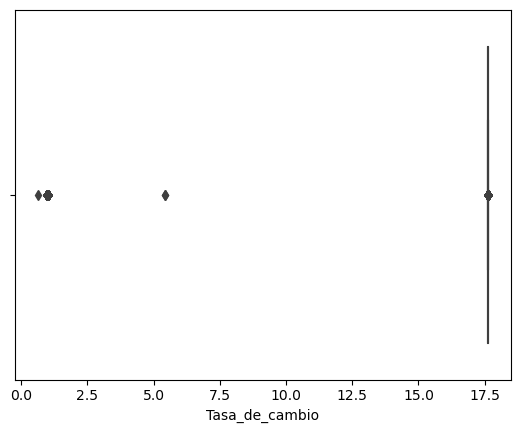

In [140]:
df_price.Tasa_de_cambio.mean()

#2 Monedas: ARS y USD ---> Forex para saber a que TC se tomaron los dolares que se convierten en PESOS o vicerversa

#Promedio es 15,46

import seaborn as sn

sn.boxplot(df_price.Tasa_de_cambio)

#tomamos tasa de cambio y los multiplicamos por el promedio asi tenemos una imputacion



In [152]:
df_price_ARS=df_price["currency"]=="ARS" #mascara

df_price[df_price_ARS]#DF con la mascara #Price es ilogico al price_aprox_local Currency
df_price["diferencia"]=df_price.price - df_price.price_aprox_local_currency


,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,expenses
9,460000.0,ARS,455201.45,25798.49,NaN,NaN,NaN,NaN,NaN
32,550000.0,ARS,544262.59,30846.02,50.0,50.0,616.920400,11000.000000,NaN
37,1250000.0,ARS,1236960.43,70104.59,75.0,75.0,934.727867,16666.666667,NaN
78,5500000.0,ARS,5442626.35,308460.22,261.0,18615.0,1181.839923,295.460650,NaN
97,1423800.0,ARS,1408947.37,79851.93,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
121202,1507000.0,ARS,1491279.61,84518.10,52.0,NaN,1625.348077,NaN,NaN
121203,1502000.0,ARS,1486331.74,84237.68,50.0,NaN,1684.753600,NaN,NaN
121204,1502000.0,ARS,1486331.74,84237.68,50.0,NaN,1684.753600,NaN,NaN
121205,1507000.0,ARS,1491279.61,84518.10,50.0,NaN,1690.362000,NaN,NaN


In [42]:
df['currency'].unique().tolist() #forma de ver los atributos unicos por campo (columna)

['USD', nan, 'ARS', 'PEN', 'UYU']

In [45]:
df_agrupado=df.groupby("currency").count()

df.groupby(['currency']).count()

df_agrupado=df_agrupado.operation

df_agrupado.sort_values(ascending=False)

currency
USD    87587
ARS    13219
PEN        2
UYU        1
Name: operation, dtype: int64

In [157]:
df_price_NAN=df_price["currency"].isnull() #mascara

df_price[df_price_NAN].head(1)

#

,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,expenses
5,NaN,NaN,NaN,NaN,53.0,NaN,NaN,NaN,NaN


In [170]:
df.head(6)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,...,35.0,1828.571429,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...
5,5,sell,house,Gualeguaychú,|Argentina|Entre Ríos|Gualeguaychú|,Argentina,Entre Ríos,3433657.0,"-33.0140714,-58.519828",-33.014071,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bop_venta_depart...,"Casa en el perímetro del barrio 338, ubicada e...","Casa Barrio 338. Sobre calle 3 de caballería, ...",https://thumbs4.properati.com/6/q-w68gvaUEQVXI...
